In [1]:
import numpy as np
import pandas as pd
from os.path import join, dirname, isfile, basename
from os import getcwd, listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
if 'jupyterthemes' in sys.modules:
    from jupyterthemes import jtplot
    jtplot.style()

In [11]:

oil = pd.read_csv('ooip.csv')
oil

,easting,northing,OOIP
0,1100.0,400.000000,2.673385
1,1100.0,504.678170,2.673385
2,1100.0,609.356341,2.673385
3,1100.0,714.034511,2.673385
4,1100.0,818.712681,2.673385
...,...,...,...
889244,95300.0,98588.123747,2.118020
889245,95300.0,98692.801918,2.118020
889246,95300.0,98797.480088,2.118020
889247,95300.0,98902.158258,2.118020


In [12]:
x = oil['easting'].to_numpy()
y = oil['northing'].to_numpy()
oil_in_place = oil['OOIP'].to_numpy()

In [13]:
print(x.shape)
print(y.shape)

(889249,)
(889249,)


In [27]:
np.unique(y).shape

(943,)

In [30]:
ooip = oil_in_place.reshape(np.unique(x).shape[0], np.unique(y).shape[0])

In [66]:
well_length = 5280 // 100
num_elements = 10
top_values = []
locations = []
for i in range(num_elements):
    found_val = -1
    found_loc = (0,0)
    for r in range(ooip.shape[0]):
        col_iter = iter(range(ooip.shape[1]))
        for c in col_iter:
            loc = (r,c)
            if loc in locations:
                for _ in range(well_length-1):
                    next(col_iter)
            else:
                val = ooip[r][c:c+well_length].sum()
                if val > found_val:
                    found_val = val
                    found_loc = loc
    top_values.append(found_val)
    locations.append(found_loc)

In [113]:
top_values


IndexError: index 952 is out of bounds for axis 0 with size 943

In [63]:
locations

[(538, 0),
 (538, 52),
 (606, 0),
 (606, 81),
 (606, 80),
 (606, 79),
 (551, 0),
 (606, 78),
 (606, 77),
 (606, 76)]

In [90]:
locations_1d = [ x[0] * ooip.shape[0] + x[1] for x in locations]

In [91]:
colors = oil_in_place/ (2 * np.amax(oil_in_place))

In [92]:
for l in locations_1d:
    colors[l:l+well_length] = [1 for _ in range(well_length)]

/Users/oimtiaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


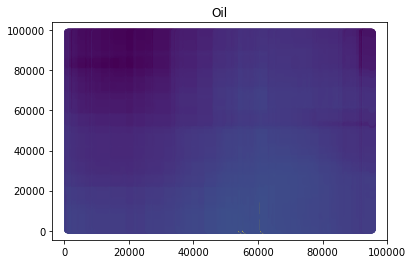

In [93]:
fig, ax = plt.subplots()
ax.scatter(x, y, c= colors)
ax.set_title("Oil")
fig.show()

In [95]:
points = []
for location in locations:
    start = location
    end = (location[0], location[1] + well_length)
    points.append((start, end))

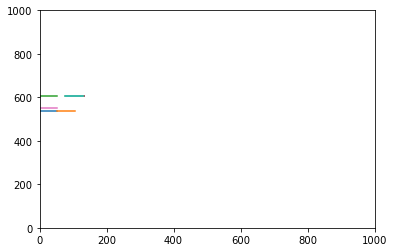

In [111]:
fig, ax = plt.subplots()
ax.set_ylim(0, 1000)
ax.set_xlim(0, 1000)
for p in points:
    # ROW
    r = (p[0][0], p[1][0])
    # COLUMN
    c = (p[0][1], p[1][1])
    ax.plot(c, r)

In [5]:
well_length = 5280
top_10 = []
for i in range(x.shape[0]-well_length):
    for j in range(y.shape[0]):
        start = (i, j)
        end = (i+well_length, j)
        
for i, location in enumerate(locations):
    x = location[0]
    y = location[1]
    i_initial = i
    output = oil[int(x / 1000 + y / 10)]
    final_x = x + well_length
    while location[0] < final_x and location[1] == y:
        i += 1
        if i >= len(locations): break
        location = locations[i]
        output += oil[int(location[0] / 1000 + y / 10)]
    if len(top_10) < 10:
        top_10.append((x, y, output))
        top_10 = sorted(top_10, key = lambda x: x[2])
    elif max([x[2] for x in top_10]) < output:
        top_10[0] = (x, y, output)
        top_10 = sorted(top_10, key = lambda x: x[2])

In [6]:
print(top_10)

[(0, 0, 4.1733731657814115), (24000, 0, 4.220360250074873), (25000, 0, 4.448792554303967), (48000, 0, 4.516745238861684), (49000, 0, 4.985231765818444), (75000, 0, 5.238751166432041), (3000, 1000, 5.277443267404443), (2000, 2000, 5.795221017429936), (5000, 2000, 5.815196575087481), (50000, 20000, 6.304550052556916)]


In [8]:
lines = [[(x[0], x[1]), (x[0] + well_length, x[1])] for x in top_10]
import matplotlib.collections as mc
lc = mc.LineCollection(lines, colors = "red", linewidths=28)
ax.add_collection(lc)

<BarContainer object of 3 artists>